In [6]:
%matplotlib inline
#
from lrgsglib.core import *
from lrgsglib.core_plots import imshow_colorbar_caxdivider
from lrgsglib.core_utils import move_to_rootf, width_interval
from lrgsglib.nx_patches import signed_spectral_layout, signedlaplacian_spectrum
#
move_to_rootf(print_tf=True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [7]:
pathising = "data/l2d_squared_CLUSTER/ising/N=16384/"
pathgraph = "data/l2d_squared_CLUSTER/graphs/N=16384/"
# for fn in os.listdir(pathising):
#     if fn.startswith('outcl'):
#         os.rename(pathising+fn, pathising+fn[:-15] + ".txt")

In [8]:
numeric_const_pattern = '[-+]? (?: (?: \d* \. \d+ ) | (?: \d+ \.? ) )(?: [Ee] [+-]? \d+ ) ?'

regex = re.compile(numeric_const_pattern, re.VERBOSE)
listp = []
for files in os.listdir(pathgraph):
    listp.extend(regex.findall(files))
listp = np.unique(listp).astype(float)

In [19]:
data = {}
clno = 3
for p in listp:
    prefixed = [filename for filename in os.listdir(pathising) if filename.startswith(f"outcl{clno}_sqLattice_p={p:.3g}_")]
    # print(prefixed)
    listT = []
    regex = re.compile(numeric_const_pattern, re.VERBOSE)
    for tfiles in [fn[len(f"outcl{clno}_sqLattice_p={p:.3g}_"):] for fn in prefixed]:
        tt = regex.findall(tfiles)
        listT.extend(tt)
    listT = np.unique(listT).astype(float)
    # print(p, listT)
    data[p] = {T: np.loadtxt(pathising + f"outcl{clno}_sqLattice_p={p:.3g}_T={T:.3g}_\"\".txt") for T in listT}

Text(0.5, 1.0, '$N=16384$')

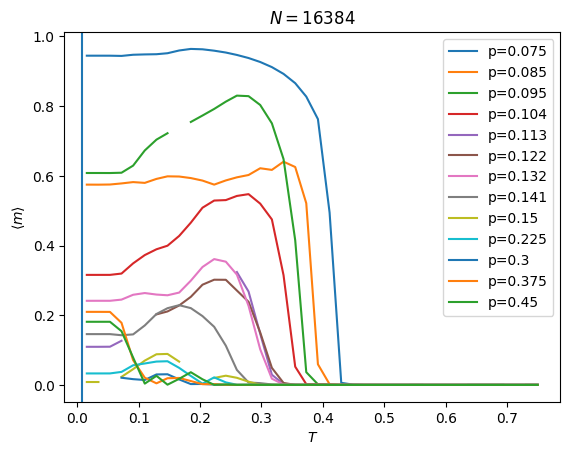

In [20]:
for p in listp:
    try:
        plt.plot(sorted(data[p].keys()), np.abs([np.mean(data[p][T][:, 0]) for T in sorted(data[p].keys())]), label=f'p={p:.3g}')
    except IndexError:
        pass
plt.ylabel(r'$\langle{m}\rangle$')
plt.xlabel(r'$T$')
plt.legend()
plt.axvline(16384**(-1/2))
plt.title(r"$N=16384$")


In [20]:
data = {}
for p in listp:
    prefixed = [filename for filename in os.listdir(pathising) if filename.startswith(f"outcl{clno}_sqLattice_p={p:.3g}_")]
    # print(prefixed)
    listT = []
    regex = re.compile(numeric_const_pattern, re.VERBOSE)
    for tfiles in [fn[len(f"outcl{clno}_sqLattice_p={p:.3g}_"):] for fn in prefixed]:
        tt = regex.findall(tfiles)
        listT.extend(tt)
    listT = np.unique(listT).astype(float)
    data[p] = []
    for cl in range(5):
        data[p].append({T: np.loadtxt(pathising + f"outcl{cl}_sqLattice_p={p:.3g}_T={T:.3g}_\"\".txt") for T in listT})

Text(0.5, 1.0, '$N=16384$, p=0.45')

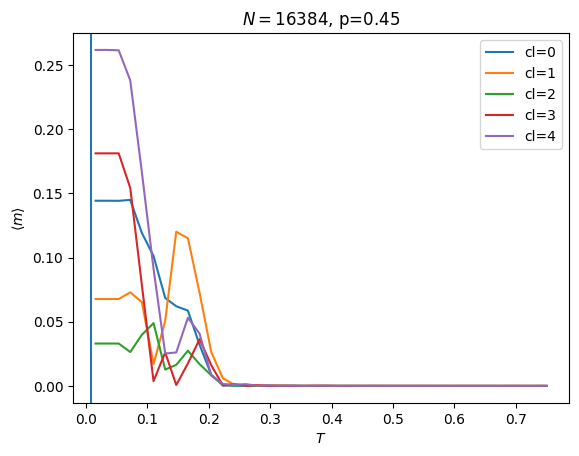

In [39]:
p = listp[12]
for cl in range(5):
    plt.plot(sorted(data[p][cl].keys()), np.abs([np.mean(data[p][cl][T][:, 0]) for T in sorted(data[p][cl].keys())]), label=f'cl={cl}')
plt.ylabel(r'$\langle{m}\rangle$')
plt.xlabel(r'$T$')
plt.legend()
plt.axvline(16384**(-1/2))
plt.title(fr"$N=16384$, p={p:.3g}")
